In [2]:
from utils.process_data import get_data

# Load data
ingredient_df = get_data()

# Define the mapping dictionary
rating_to_int = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# Apply the mapping to the 'Animal Welfare Rating' column
x = [rating_to_int[val] for val in ingredient_df['Animal Welfare Rating'].values]

print(x)
print(x[0])
print(type(x))


Successfully read 137 lines from the file. Loaded 136 ingredients.
[1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
1
<class 'list'>


Estimated number of people not eating the ingredient: 251 out of 1000
Total expected consumption: 9309.15 grams
Total expected food waste for 1000 people: 390690.85 grams
Mean of the normal distribution samples: 9.30914660535424
Standard deviation of the normal distribution samples: 8.96575466666406


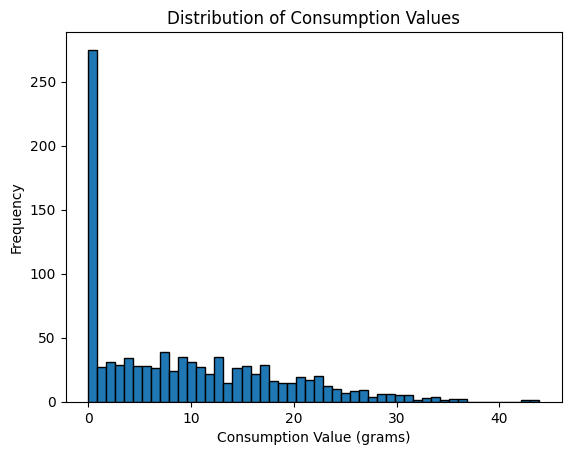

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
mean = 7.59490565
standard_deviation = 11.22572649
threshold = 0  # Define the threshold below which people won't eat
value_in_meal_plan = 400
num_people = 1000  # Example number of people

# Generate random values from a normal distribution for each person
consumption_values = np.random.normal(loc=mean, scale=standard_deviation, size=num_people)

# Replace negative values with zero for realistic consumption values
consumption_values = np.where(consumption_values < 0, 0, consumption_values)

# Calculate the number of people not eating the ingredient
num_not_eating = np.sum(consumption_values == 0)

# Calculate the total expected consumption
total_expected_consumption = np.sum(consumption_values)

# Calculate the expected food waste
total_food_waste = value_in_meal_plan * num_people - total_expected_consumption

# Print results
print(f"Estimated number of people not eating the ingredient: {num_not_eating} out of {num_people}")
print(f"Total expected consumption: {total_expected_consumption:.2f} grams")
print(f"Total expected food waste for {num_people} people: {total_food_waste:.2f} grams")

# Optional: Print mean and standard deviation of the samples
print("Mean of the normal distribution samples:", np.mean(consumption_values))
print("Standard deviation of the normal distribution samples:", np.std(consumption_values))

# Visualize the distribution
plt.hist(consumption_values, bins=50, edgecolor='black')
plt.title('Distribution of Consumption Values')
plt.xlabel('Consumption Value (grams)')
plt.ylabel('Frequency')
plt.show()


In [11]:
from gymnasium.envs.registration import register
import gymnasium as gym

register(
    id='SchoolMealSelection-v1',
    entry_point='models.envs.env_working:SchoolMealSelection',
    max_episode_steps=10,  # Allow multiple steps per episode, adjust as needed
)

# Get the environment specification for 'SchoolMealSelection-v1'
env_spec = gym.envs.registry.get('SchoolMealSelection-v1')

if env_spec:
    print(f"\nEnvironment ID: {env_spec.id}")
    print(f"Entry Point: {env_spec.entry_point}")
    print(f"Max Episode Steps: {env_spec.max_episode_steps}")
else:
    print("Environment 'SchoolMealSelection-v1' is not registered.")



Environment ID: SchoolMealSelection-v1
Entry Point: models.envs.env_working:SchoolMealSelection
Max Episode Steps: 10


/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment SchoolMealSelection-v1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [3]:
ingredient_group_target_ranges = {
    'fruit': 1, # 1 fruit a day per meal
    'veg': 1, # 1 veg per day per meal
    'non_processed_protein': 1, # Portion of non processed protein has to be provided accept if a portion of processed protein is provided. This current env is one day meal selection.
    'processed_protein': 1, # Processed protein, see above ^
    'carbs': 1, # Starchy food , a portion of this should be provided every day
    'dairy': 1, # Dairy, a portion of this should be provided every day
    'bread': 1, # Bread should be provided as well as a portion of starchy food
    'confectionary': 0 # No confectionary should be provided
}
print(len(ingredient_group_target_ranges.keys()))
food_group_counts = {k: 0 for k in ingredient_group_target_ranges.keys()}

8


In [2]:
import unittest

# Assuming the function and necessary variables are defined in a module named 'reward_module'
from models.reward.reward import group_count_reward

class TestGroupCountReward(unittest.TestCase):

    def setUp(self):
        # Setting up default values for the tests
        self.ingredient_group_portion = {
            'non_processed_protein': 300,
            'processed_protein': 200,
            'confectionary': 150,
            'vegetables': 500,
            'fruits': 300
        }
        
        self.ingredient_group_count = {
            'non_processed_protein': 3,
            'processed_protein': 2,
            'confectionary': 1,
            'vegetables': 5,
            'fruits': 3
        }
        
        self.ingredient_group_portion_targets = {
            'non_processed_protein': (100, 150),
            'processed_protein': (80, 120),
            'confectionary': (50, 60),
            'vegetables': (80, 100),
            'fruits': (90, 110)
        }
        
        self.ingredient_group_count_targets = {
            'non_processed_protein': 3,
            'processed_protein': 2,
            'confectionary': 1,
            'vegetables': 5,
            'fruits': 3
        }

    def test_all_targets_met(self):
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': 50,
            'processed_protein': 50,
            'confectionary': 100,
            'vegetables': 100,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertTrue(all_targets_met)
    
    def test_protein_target_not_met(self):
        self.ingredient_group_count['non_processed_protein'] = 2
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': -50,
            'processed_protein': -50,
            'confectionary': 100,
            'vegetables': 100,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)
    
    def test_protein_target_exceeded(self):
        self.ingredient_group_count['non_processed_protein'] = 4
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': -25,
            'processed_protein': -25,
            'confectionary': 100,
            'vegetables': 100,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)
    
    def test_confectionary_target_not_met(self):
        self.ingredient_group_count['confectionary'] = 0
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': 50,
            'processed_protein': 50,
            'confectionary': -100,
            'vegetables': 100,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)
    
    def test_other_group_target_not_met(self):
        self.ingredient_group_count['vegetables'] = 4
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': 50,
            'processed_protein': 50,
            'confectionary': 100,
            'vegetables': -100,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)
    
    def test_other_group_target_exceeded(self):
        self.ingredient_group_count['vegetables'] = 6
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': 50,
            'processed_protein': 50,
            'confectionary': 100,
            'vegetables': 0,
            'fruits': 100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)

    def test_combination_of_targets(self):
        self.ingredient_group_count['non_processed_protein'] = 4
        self.ingredient_group_count['processed_protein'] = 3
        self.ingredient_group_count['confectionary'] = 2
        self.ingredient_group_count['vegetables'] = 4
        self.ingredient_group_count['fruits'] = 2
        
        ingredient_group_count_rewards = {group: 0 for group in self.ingredient_group_count}
        
        expected_rewards = {
            'non_processed_protein': -50,
            'processed_protein': -50,
            'confectionary': -100,
            'vegetables': -100,
            'fruits': -100
        }
        
        rewards, all_targets_met = group_count_reward(ingredient_group_count_rewards)
        
        self.assertEqual(rewards, expected_rewards)
        self.assertFalse(all_targets_met)

if __name__ == '__main__':
    unittest.main()


usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument '/home/laurie2905/.local/share/jupyter/runtime/kernel-v2-516hmvS5eIBZeMQ.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [3]:
x = []

if x:
    print("List is not empty")

List is not empty


In [1]:
from utils.process_data import get_data
ingredient_df = get_data()

Successfully read 137 lines from the file. Loaded 136 ingredients.


In [2]:
print(ingredient_df.keys())

Index(['Category1', 'Category2', 'Category3', 'Category4', 'Category5',
       'Category6', 'Category7', 'Mean_g_per_day', 'StandardDeviation',
       'Coefficient of Variation', 'Cost_100g', 'Calories_kcal_per_100g',
       'Fat_g', 'Saturates_g', 'Carbs_g', 'Sugars_g', 'Fibre_g', 'Protein_g',
       'Salt_g', 'CO2_kg_per_100g', 'Animal Welfare Rating',
       'Rainforest Rating', 'Water Scarcity Rating', 'CO2 FU Rating',
       'Group A veg', 'Group A fruit', 'Group B', 'Oily Fish', 'Red protein',
       'Group C', 'Group D', 'Group E', 'Oil', 'Bread', 'Confectionary'],
      dtype='object')


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Actor and Critic
class Actor(nn.Module):
    def __init__(self, state_dim, selection_action_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, selection_action_dim)
        self.fc3 = nn.Linear(128, selection_action_dim)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        
        quantity = torch.relu(self.fc3(x))
        return quantity

class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        value = self.fc2(x)
        return value

In [77]:
import os
x = os.path.abspath("Masters_RL/saved_models/tensorboard/a2c_simple_calorie_env/")
print(os.path.exists(x))

False


In [70]:
import gymnasium
from gym import spaces
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class CustomEnv(gym.Env):
    def __init__(self, ingredient_df, num_people=1):
        super(CustomEnv, self).__init__()
        
        self.ingredient_df = ingredient_df
        self.num_people = num_people
        
        # Define action space
        n_ingredients = len(self.ingredient_df)
        
        self.action_space = spaces.Dict({
            'selection': spaces.MultiBinary(n_ingredients),
            'quantity': spaces.Box(low=0, high=100, shape=(n_ingredients,), dtype=np.float32)
        })
        
        # State includes quantities of ingredients and average calories
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(n_ingredients + 1,), dtype=np.float32)
        
        # self.state = None

    # def reset(self):
    #     n_ingredients = len(self.ingredient_df)
    #     self.state = np.zeros(n_ingredients + 1, dtype=np.float32)  # Reset state to zeros including average calories
    #     return self.state

    def calculate_reward(self, action):
        reward = 0.0
        
        # Convert action selection and quantity to numpy arrays
        selection = np.array(action['selection'], dtype=np.float32)
        quantity = np.array(action['quantity'], dtype=np.float32)
        
        # Reward based on the number of selected ingredients
        total_selection = np.sum(selection)
        
        if total_selection > 10:
            reward -= 10
        elif total_selection < 5:
            reward -= 10
        else:
            reward += 10
        
        # Calculate calories for selected ingredients
        calories_per_100g = self.ingredient_df['Calories_kcal_per_100g'].values
        calories_selected_ingredients = selection * quantity * calories_per_100g / 100
        
        # Calculate average calories per day per person
        average_calories_per_day = np.sum(calories_selected_ingredients) / self.num_people
        
        # Reward based on the average calories per day
        if 2000 <= average_calories_per_day <= 3000:
            reward += 100
            done = True
        else:
            reward -= 10
            done = False
        
        return reward, average_calories_per_day, done

    def step(self, action):
        n_ingredients = len(self.ingredient_df)
        
        # Update the state based on action
        self.state[:n_ingredients] = action['quantity']  # Update state with quantities of selected ingredients
        
        # Calculate reward
        reward, average_calories_per_day, done = self.calculate_reward(action)
        
        # Update the state with average calories
        self.state[-1] = average_calories_per_day
        
        info = {
            'average_calories_per_day': average_calories_per_day
        }

        return self.state, reward, done, info

def train_actor_critic(env, actor, critic, num_episodes=1000, gamma=0.99, actor_lr=1e-4, critic_lr=1e-3, device='cuda'):
    # Move models to the GPU
    actor.to(device)
    critic.to(device)
    
    actor_optimizer = optim.Adam(actor.parameters(), lr=actor_lr)
    critic_optimizer = optim.Adam(critic.parameters(), lr=critic_lr)
    mse_loss = nn.MSELoss()

    for episode in range(num_episodes):
        state = env.reset()
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        done = False
        total_reward = 0
        episode_info = None

        while not done:
            selection_probs, quantity = actor(state)
            selection = (selection_probs > 0.5).float()  # Binarize selection actions
            action = {
                'selection': selection.detach().cpu().numpy().squeeze(),
                'quantity': quantity.detach().cpu().numpy().squeeze()
            }
            next_state, reward, done, info = env.step(action)
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(device)
            reward = torch.tensor([reward], dtype=torch.float32).to(device)

            # Save the info for the end of the episode
            episode_info = info

            # Update Critic
            value = critic(state)
            next_value = critic(next_state)
            target = reward + (1 - done) * gamma * next_value
            critic_loss = mse_loss(value, target.detach())
            critic_optimizer.zero_grad()
            critic_loss.backward()
            critic_optimizer.step()

            # Update Actor
            advantage = (target - value).detach()
            actor_loss = -advantage * (selection_probs.mean() + quantity.mean())
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()

            state = next_state
            total_reward += reward

            # Debug prints
            print(f"Reward: {reward.item()}, Done: {done}")

        if episode_info is not None and 'average_calories_per_day' in episode_info:
            average_calories_per_day = episode_info['average_calories_per_day']
        else:
            average_calories_per_day = float('nan')

        print(f"Episode: {episode+1}, Total Reward: {total_reward.item()}, Average Calories per Day: {average_calories_per_day}")


In [69]:
# Create environment and models
env = CustomEnv(ingredient_df)

state_dim = env.state.shape[0]
selection_action_dim = env.action_space['selection'].n
actor = Actor(state_dim, selection_action_dim)
critic = Critic(state_dim)


# Train the model
train_actor_critic(env, actor, critic, num_episodes=5)

# Evaluate the model
# evaluate_actor(env, actor, num_days=5)

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
# Evaluation function
def evaluate_actor(env, actor, num_days=5):
    state = env.reset()
    state = torch.FloatTensor(state).unsqueeze(0)
    done = False
    total_reward = 0
    episode_selections = []

    while not done:
        with torch.no_grad():
            selection_probs, quantity = actor(state)
            selection = (selection_probs > 0.5).float()  # Binarize selection actions
            action = {
                'selection': selection.detach().numpy().squeeze(),
                'quantity': quantity.detach().numpy().squeeze()
            }
        next_state, reward, done, info = env.step(action)
        next_state = torch.FloatTensor(next_state).unsqueeze(0)
        episode_selections.append(action)

        state = next_state
        total_reward += reward

    print(f"Evaluation Total Reward: {total_reward}")
    for day, selections in enumerate(env.selections, 1):
        print(f"Day {day}:")
        for i, (selection, quantity) in enumerate(selections):
            print(f"  Try {i+1}: Selection - {selection}, Quantity - {quantity}")

